In [2]:
import analysis as ana
import matplotlib.pyplot as plt
import importlib as ilb
ilb.reload(ana)
%matplotlib inline

# 2016-9-22

## Multiple Stream Experiments

Run captioner with 1,2,3 video streams. Configurations are as follow

__Num of Stream: 1__

InputFiles = [
"/home/peifeng/work/data/The_Nut_Job_trailer.mp4"
]

- captioning-1: batch-size=60, input-fps=20, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-2: batch-size=60, input-fps=30, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-3: batch-size=60, input-fps=40, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1

__Num of Stream: 2__

InputFiles = [
"/home/peifeng/work/data/Vid_I_person_crossing.avi",
"/home/peifeng/work/data/The_Nut_Job_trailer.mp4"
]

- captioning-4: batch-size=60, input-fps=20, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-5: batch-size=60, input-fps=30, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-6: batch-size=60, input-fps=40, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1

__Num of Stream: 3__

InputFiles = [
"/home/peifeng/work/data/Vid_A_ball.avi",
"/home/peifeng/work/data/Vid_I_person_crossing.avi",
"/home/peifeng/work/data/The_Nut_Job_trailer.mp4"
]

- captioning-7: batch-size=60, input-fps=20, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-8: batch-size=60, input-fps=30, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-9: batch-size=60, input-fps=40, scale=3, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1

__Num of Stream: 2__

InputFiles = [
"/home/peifeng/work/data/Vid_I_person_crossing.avi",
"/home/peifeng/work/data/The_Nut_Job_trailer.mp4"
]

- captioning-10: batch-size=60, input-fps=20, scale=6, vgg=2 GPU, captioner=2 GPU, timer=nano, num-workers=1
- captioning-11: batch-size=60, input-fps=30, scale=6, vgg=2 GPU, captioner=2 GPU, timer=nano, num-workers=1
- captioning-12: batch-size=60, input-fps=40, scale=6, vgg=2 GPU, captioner=2 GPU, timer=nano, num-workers=1

In [38]:
%capture
ilb.reload(ana)
ana.global_perBatch = False
cap_mul_s1 = ana.cross_res(*['2016-9-22/captioning-{}'.format(idx) for idx in [10, 11, 12]])

Collect log from ['archive/2016-9-22/captioning-10/clarity26/6700/worker.log']
Collect cpu log from archive/2016-9-22/captioning-10/clarity26/log.cpu


the glob pattern is archive/2016-9-22/captioning-10/clarity26/*/worker.log


Auto fixed cross stage timming issues for 0 log entries
Dropped 0 frames
Collect log from ['archive/2016-9-22/captioning-11/clarity26/6700/worker.log']
Collect cpu log from archive/2016-9-22/captioning-11/clarity26/log.cpu


the glob pattern is archive/2016-9-22/captioning-11/clarity26/*/worker.log


Auto fixed cross stage timming issues for 0 log entries
Dropped 0 frames
Collect log from ['archive/2016-9-22/captioning-12/clarity26/6700/worker.log']
Collect cpu log from archive/2016-9-22/captioning-12/clarity26/log.cpu


the glob pattern is archive/2016-9-22/captioning-12/clarity26/*/worker.log


Auto fixed cross stage timming issues for 0 log entries
Dropped 0 frames


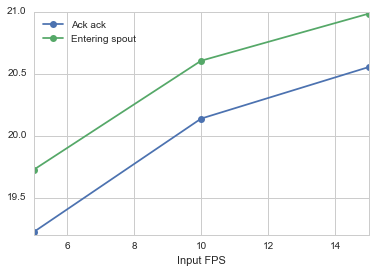

In [39]:
cap_mul_s1.fps(x=("Input FPS", lambda exp: int(exp.params['fps'])))